## <font color='red' >Useful libraries and packages</font>
***
<body>
<p><font face="Consolas">It's Python, there's rarely the need to re-invent the wheel!</font></p>
</body>

### numPy (arrays made easy)   http://www.numpy.org/

#### NumPy is the fundamental package for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

#### Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

To use numPy, we first need to import the `numpy` package:

In [1]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [2]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print type(a), a.shape, a[0], a[1], a[2]
a[0] = 5                 # Change an element of the array
print a                  

<type 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [3]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print b

[[1 2 3]
 [4 5 6]]


In [4]:
print b.shape                   
print b[0, 0], b[0, 1], b[1, 0]

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [5]:
a = np.zeros((2,2))  # Create an array of all zeros
print a

[[ 0.  0.]
 [ 0.  0.]]


In [6]:
b = np.ones((1,2))   # Create an array of all ones
print b

[[ 1.  1.]]


In [7]:
c = np.full((2,2), 7) # Create a constant array
print c 

[[7 7]
 [7 7]]


In [8]:
d = np.eye(2)        # Create a 2x2 identity matrix
print d

[[ 1.  0.]
 [ 0.  1.]]


In [9]:
e = np.random.random((2,2)) # Create an array filled with random values between 0 and 1
print e

[[ 0.43469483  0.93852056]
 [ 0.49566446  0.96462092]]


### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [10]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print a
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print b

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [11]:
print a[0, 1]  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print a[0, 1] 

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [12]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print a

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [13]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print row_r1, row_r1.shape 
print row_r2, row_r2.shape
print row_r3, row_r3.shape

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [14]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print col_r1, col_r1.shape
print
print col_r2, col_r2.shape

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [15]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print a

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [16]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print a[np.arange(4), b]  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [17]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print a

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [18]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print bool_idx

[[False False]
 [ True  True]
 [ True  True]]


### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [19]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print x.dtype, y.dtype, z.dtype

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [20]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print x + y
print np.add(x, y)

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]


In [21]:
# Elementwise difference; both produce the array
print x - y
print np.subtract(x, y)

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [22]:
# Elementwise product; both produce the array
print x * y
print np.multiply(x, y)

[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]


In [23]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print x / y
print np.divide(x, y)

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]


In [24]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print np.sqrt(x)

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


In [25]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print v.dot(w)
print np.dot(v, w)

219
219


In [26]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print x.dot(v)
print np.dot(x, v)

[29 67]
[29 67]


In [27]:
# Matrix / matrix product; both produce the rank 2 array

print x
print y

# [[19 22]
#  [43 50]]
print x.dot(y)
print np.dot(x, y)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [28]:
# Can do cross products too! 
print np.cross(x,y)

[-4 -4]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [29]:
x = np.array([[1,2],[3,4]])

print np.sum(x)  # Compute sum of all elements; prints "10"
print np.sum(x, axis=0)  # Compute sum of each column; prints "[4 6]"
print np.sum(x, axis=1)  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [30]:
print x
print x.T

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


### arange

In [31]:
np.arange(1,100,3) #return a sequence from 1 to (but not including) 100, increment by 3

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97])

In [32]:
#This becomes extremely valuable for looping
for x in np.arange(1,20,2):
    print(x)

1
3
5
7
9
11
13
15
17
19


This brief overview has touched on many of the important things that you need to know about numPy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numPy.

## Matplotlib

Matplotlib is a graphical plotting library. In this section, I give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [33]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [34]:
%matplotlib inline

### 2-D Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

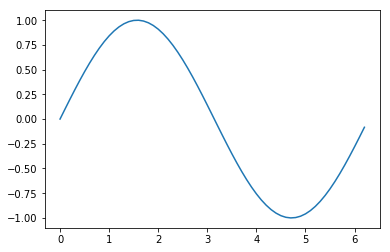

In [35]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 2 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

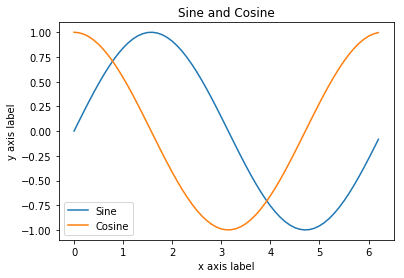

In [36]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

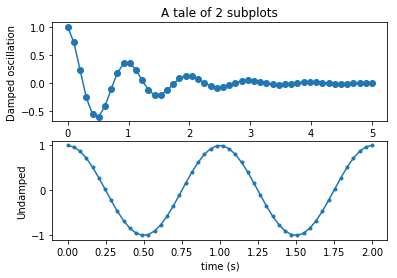

In [37]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

### Scatter Plots

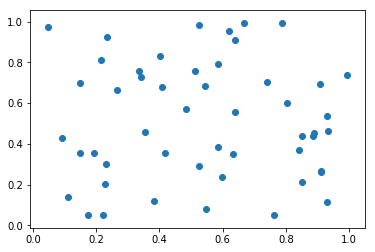

In [38]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y,)
plt.show()

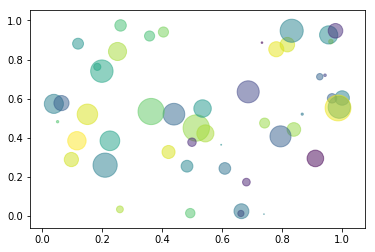

In [39]:
#Another way to visualize?
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

### Multiple axes scales

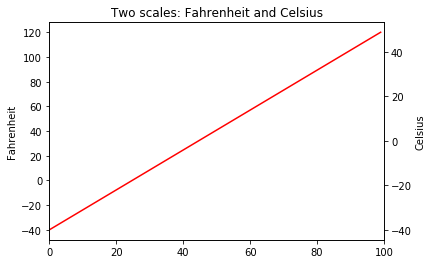

In [40]:
"""
Demo of how to display two scales on the left and right y axis.

This example uses the Fahrenheit and Celsius scales.
"""
import matplotlib.pyplot as plt
import numpy as np


def fahrenheit2celsius(temp):
    """
    Returns temperature in Celsius.
    """
    return (5. / 9.) * (temp - 32)


def convert_ax_c_to_celsius(ax_f):
    """
    Update second axis according with first axis.
    """
    y1, y2 = ax_f.get_ylim()
    ax_c.set_ylim(fahrenheit2celsius(y1), fahrenheit2celsius(y2))
    ax_c.figure.canvas.draw()

fig, ax_f = plt.subplots()
ax_c = ax_f.twinx()

# automatically update ylim of ax2 when ylim of ax1 changes.
ax_f.callbacks.connect("ylim_changed", convert_ax_c_to_celsius)
ax_f.plot(np.linspace(-40, 120, 100),'r')
ax_f.set_xlim(0, 100)

ax_f.set_title('Two scales: Fahrenheit and Celsius')
ax_f.set_ylabel('Fahrenheit')
ax_c.set_ylabel('Celsius')

plt.show()

### Contouring (adding a Z field)

A contour line or isoline of a function of two variables is a curve along which the function has a constant value.

It is a cross-section of the three-dimensional graph of the function f(x, y) parallel to the x, y plane.

Contour lines are used e.g. in geography and meteorology.

In cartography, a contour line joins points of equal elevation (height) above a given level, such as mean sea level.

We can also say in a more general way that a contour line of a function with two variables is a curve which connects points with the same values.

A contour plot can be created with the plt.contour function. It takes three arguments: a grid of x values, a grid of y values, and a grid of z values. The x and y values represent positions on the plot, and the z values will be represented by the contour levels. Perhaps the most straightforward way to prepare such data is to use the np.meshgrid function, which builds two-dimensional grids from one-dimensional arrays:

In [41]:
import numpy as np
xlist = np.linspace(-3.0, 3.0, 3)
ylist = np.linspace(-3.0, 3.0, 4)
X, Y = np.meshgrid(xlist, ylist)
print(xlist)
print(ylist)
print(X)
print(Y)

[-3.  0.  3.]
[-3. -1.  1.  3.]
[[-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]]
[[-3. -3. -3.]
 [-1. -1. -1.]
 [ 1.  1.  1.]
 [ 3.  3.  3.]]


In [42]:
Z = np.sqrt(X**2 + Y**2)
print(Z)

[[ 4.24264069  3.          4.24264069]
 [ 3.16227766  1.          3.16227766]
 [ 3.16227766  1.          3.16227766]
 [ 4.24264069  3.          4.24264069]]


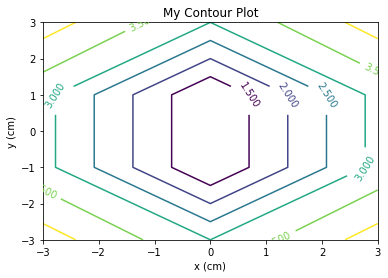

In [43]:
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=True, fontsize=10)
plt.title('My Contour Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

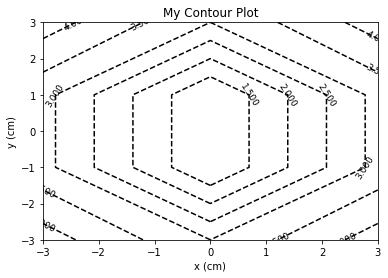

In [44]:
cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed')
plt.clabel(cp, inline=False, fontsize=9)
plt.title('My Contour Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

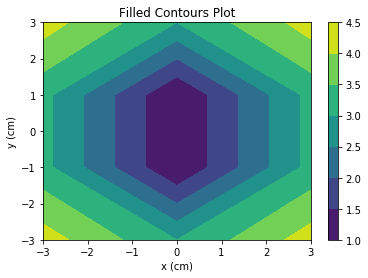

In [45]:
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

The levels were decided automatically by contour and contourf so far. They can be defined manually, by providing a list of levels as a fourth parameter. Contour lines will be drawn for each value in the list, if we use contour. For contourf, there will be filled colored regions between the values in the list.

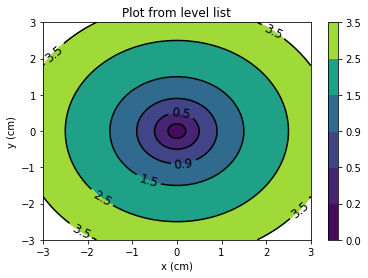

In [46]:
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X ** 2 + Y ** 2 )
levels = [0.0, 0.2, 0.5, 0.9, 1.5, 2.5, 3.5]
contour = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
contour_filled = plt.contourf(X, Y, Z, levels)
plt.colorbar(contour_filled)
plt.title('Plot from level list')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

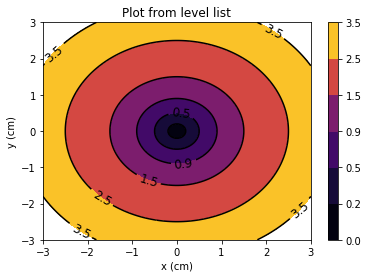

In [47]:
#So, you want a different colorbar?
from matplotlib import cm

xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X ** 2 + Y ** 2 )
levels = [0.0, 0.2, 0.5, 0.9, 1.5, 2.5, 3.5]
contour = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
contour_filled = plt.contourf(X, Y, Z, levels, cmap =cm.inferno)
plt.colorbar(contour_filled)
plt.title('Plot from level list')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

Check out the [colormap reference](https://matplotlib.org/examples/color/colormaps_reference.html) to see all the colormap options. You can even make your own. 

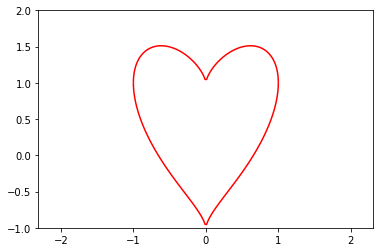

In [48]:
#Python is lovely! I'll let you examine this one on your own time! 
y, x = np.ogrid[-1:2:100j, -1:1:100j]
plt.contour(x.ravel(), y.ravel(), x**2 + (y-((x**2)**(1.0/3)))**2, [1],colors='red')
plt.axis('equal')
plt.show()

### Showcase

In [49]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [50]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

First, a standard line-only contour plot:

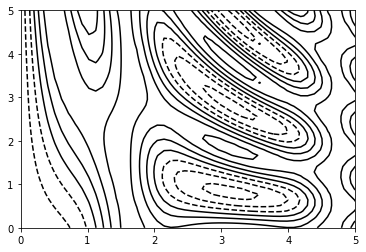

In [51]:
plt.contour(X, Y, Z, colors='black')

Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines. Alternatively, the lines can be color-coded by specifying a colormap with the cmap argument. Here, we'll also specify that we want more lines to be drawnâ€”20 equally spaced intervals within the data range:

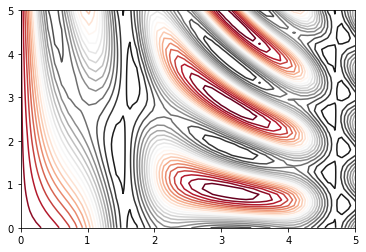

In [52]:
plt.contour(X, Y, Z, 20, cmap='RdGy')

Our plot is looking nicer, but the spaces between the lines may be a bit distracting. We can change this by switching to a filled contour plot using the plt.contourf() function (notice the f at the end), which uses largely the same syntax as plt.contour().

Additionally, we'll add a plt.colorbar() command, which automatically creates an additional axis with labeled color information for the plot:

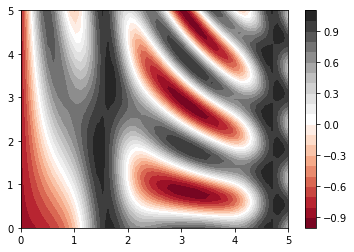

In [53]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired. This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level. A better way to handle this is to use the plt.imshow() function, which interprets a two-dimensional grid of data as an image.

The following code shows this:

(0.0, 5.0, 0.0, 5.0)

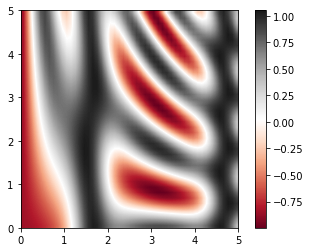

In [54]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',cmap='RdGy', interpolation='bilinear') #Many other interpolation options
plt.colorbar()
plt.axis(aspect='image')

There are a few potential gotchas with imshow(), however:

plt.imshow() doesn't accept an x and y grid, so you must manually specify the extent [xmin, xmax, ymin, ymax] of the image on the plot.
plt.imshow() by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
plt.imshow() will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, plt.axis(aspect='image') to make x and y units match.

Finally, it can sometimes be useful to combine contour plots and image plots. For example, here we'll use a partially transparent background image (with transparency set via the alpha parameter) and overplot contours with labels on the contours themselves (using the plt.clabel() function):

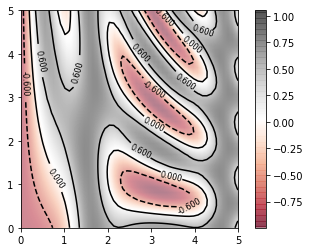

In [55]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',cmap='RdGy', alpha=0.5, interpolation='bilinear')
plt.colorbar()

### 3-D Plotting

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples. In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ax.plot3D and ax.scatter3D functions. The call signature for these is nearly identical to that of their two-dimensional counterparts.

Matplotlib was initially designed with only two-dimensional plotting in mind. Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization. three-dimensional plots are enabled by importing the mplot3d toolkit, included with the main Matplotlib installation:

In [56]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword projection='3d' to any of the normal axes creation routines:

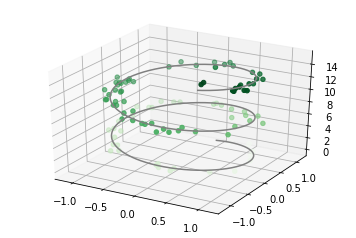

In [57]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

mplot3d contains tools to create three-dimensional relief plots using the same inputs. Like two-dimensional ax.contour plots, ax.contour3D requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point. Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

In [58]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Text(0.5,0,u'z')

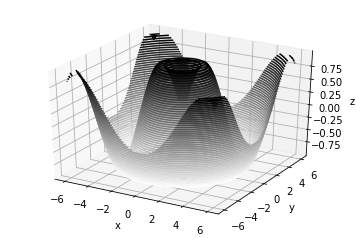

In [59]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

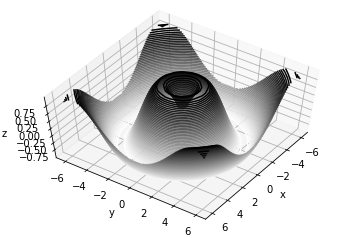

In [60]:
ax.view_init(60, 35)
fig

Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots. These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize. Here's an example of using a wireframe:

Text(0.5,0.92,u'wireframe')

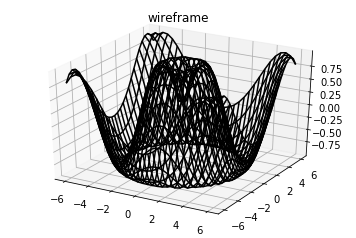

In [61]:
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

Text(0.5,0.92,u'surface')

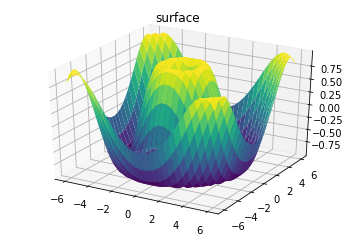

In [62]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')

## So many examples to test at https://matplotlib.org/gallery.html